# Health Dataset with Pandas

Basic analysis of the health insurance marketplace dataset from Kaggle: https://www.kaggle.com/hhsgov/health-insurance-marketplace

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="white", color_codes=True)
%matplotlib inline

Some options for Pandas

In [2]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

Import the CSV file containing the health dataset as a Pandas DataFrame

In [195]:
#df = pd.read_csv("test.csv")  # test dataset with only 30000 rows
df = pd.read_csv("Rate.csv")

## Quick data exploration

In [196]:
df.shape

(12694445, 24)

In [148]:
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum', 'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate', 'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents', 'RowNumber'], dtype='object')

In [149]:
df.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [150]:
df.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,12694445.000000,12694445.000000,12694445.000000,12694445.000000,12694445.000000,4932349.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,12694445.000000
mean,2015.033525,52485.924252,6.865558,52485.924252,4098.026459,543.691079,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774,6348.572395
std,0.794052,26412.626692,3.857180,26412.626692,61222.712586,294.591582,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174,9011.434979
min,2014.000000,10046.000000,1.000000,10046.000000,0.000000,41.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2014.000000,30219.000000,4.000000,30219.000000,29.330000,339.120000,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000,873.000000
50%,2015.000000,49532.000000,6.000000,49532.000000,291.600000,463.290000,49.770000,51.240000,74.680000,98.800000,77.250000,97.910000,116.710000,2728.000000
75%,2016.000000,76526.000000,9.000000,76526.000000,478.980000,684.390000,69.900000,72.230000,107.670000,137.080000,110.430000,136.330000,167.960000,7577.000000
max,2016.000000,99969.000000,24.000000,99969.000000,999999.000000,6604.610000,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,63493.000000


In [151]:
df.dtypes

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
VersionNum                                     int64
ImportDate                                    object
IssuerId2                                      int64
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            f

Break down the dataset into the individual US states

In [152]:
states = df["StateCode"].value_counts()
plans = df["PlanId"].value_counts()
states

FL    1702472
SC    1563770
MI    1023190
WI    1013278
OH     884530
TX     859714
IN     677393
PA     475022
GA     472012
IL     432827
NC     365684
AZ     350032
VA     325316
AL     196896
OK     186472
NJ     173175
LA     172060
IA     170610
WV     162322
TN     155994
MO     148948
MT     148632
KS     113504
ND     104408
UT      85398
AR      84790
AK      84412
NE      80902
SD      76000
ME      72752
ID      69442
OR      68402
WY      46134
MS      42482
NM      37832
NV      32016
NH      18176
DE      15928
HI       1518
Name: StateCode, dtype: int64

In [153]:
no_of_states = len(states)
no_of_plans = len(plans)
no_of_states, no_of_plans

(39, 16808)

We have data from 39 states, covering 16808 health insurance plans.

## Data cleaning

First we look at unique values in the columns to see if there are any strange values.

In [154]:
df['Age'].unique()  #do this for columns containing categories

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over'], dtype=object)

Based on the .describe() output, we can plot histograms of the columns containing numerical values that seem to be off.

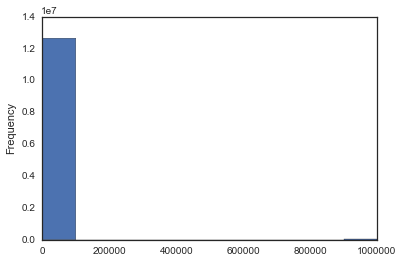

In [155]:
df['IndividualRate'].plot.hist()

There seems to be a problem with the individual rates. Let's try to find the outlieres

In [193]:
df.sort_values(by='IndividualRate') #na_position='first') # use na_position='first' to see the largest values in a long list

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
7041246,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 7,No Preference,65 and over,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,657
7040586,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,29,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437
7040589,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,30,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438
7040592,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,31,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439
7040595,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,32,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440
7040598,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,33,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441
7040601,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,34,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442
7040604,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,35,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443
7040583,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,28,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436
7040607,2015,AR,75293,SERFF,12,2015-07-22 12:46:44,75293,71-0226428,2015-01-01,2015-12-31,75293AR0970001,Rating Area 3,No Preference,36,3.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444


We can fix the 0, 999999, etc, entries by specifying a list of NaN values before reading in the csv file. We can also leave out some of the columns.

In [3]:
na_values = ['NaN', 'N/A', '0', '0.01', '9999', '9999.99', '999999']
#df = pd.read_csv("Rate.csv", na_values=na_values)   # test dataset with only 30000 rows
df = pd.read_csv("Rate.csv", na_values=na_values, usecols=['BusinessYear', 'StateCode', 'PlanId', 'RatingAreaId','Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate','Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'])

Now we should get rid of duplicates

In [4]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df.shape

(12442241, 15)

## More data cleaning based on a first in-depth look at the data with some basic plots

The data covers three consecutive years. Let's see how the years compare.

In [6]:
df["BusinessYear"].value_counts()

2015    4585265
2016    4180939
2014    3676037
Name: BusinessYear, dtype: int64

The data seems to be more or less evenly distributed over the three years. Let's have a look at trends over the years.

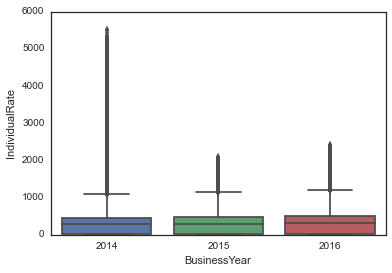

In [7]:
#sns.violinplot(x="BusinessYear", y="Couple", data=df)
sns.boxplot(x="BusinessYear", y="IndividualRate", data=df)

What's going on in 2014? These outliers make the boxchart unreadable. Let's break it down by States. 

But first let's make sure that the output is in alphabetical order.

In [8]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

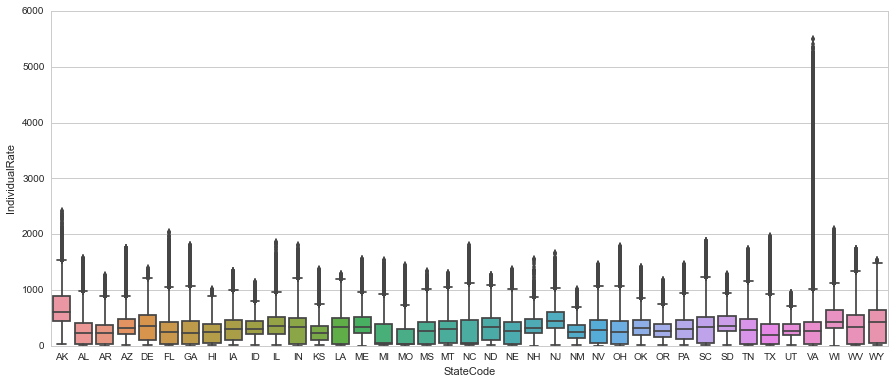

In [9]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df, order=Statelist)

What's going on in Virginia? It is this State that's causing the outliers in the 2014 statistics. Let's look at 2014 in VA in detail.

### The case of Virginia

First we split the dataframe into three separate dataframes

In [9]:
df2014 = df[df['BusinessYear'].isin([2014])].copy()
df2015 = df[df['BusinessYear'].isin([2015])].copy()
df2016 = df[df['BusinessYear'].isin([2016])].copy()

In [10]:
df2014.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3676037,3549143.000000,1601995.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,2014,317.420019,560.159229,48.318870,48.799154,68.371658,92.581684,71.081461,90.425835,114.622133
std,0,287.629720,334.529592,19.841312,18.060111,29.339670,45.725490,30.832572,42.059903,58.095334
min,2014,6.000000,55.660000,10.000000,10.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,2014,32.880000,341.200000,31.570000,33.590000,44.460000,53.670000,48.452500,61.860000,73.900000
50%,2014,293.700000,475.960000,46.355000,47.735000,69.485000,96.300000,71.330000,93.490000,119.640000
75%,2014,460.940000,695.310000,60.360000,60.360000,87.470000,121.387500,90.937500,117.405000,151.345000
max,2014,5503.850000,6604.610000,182.400000,169.650000,248.110000,357.940000,260.850000,339.310000,449.140000


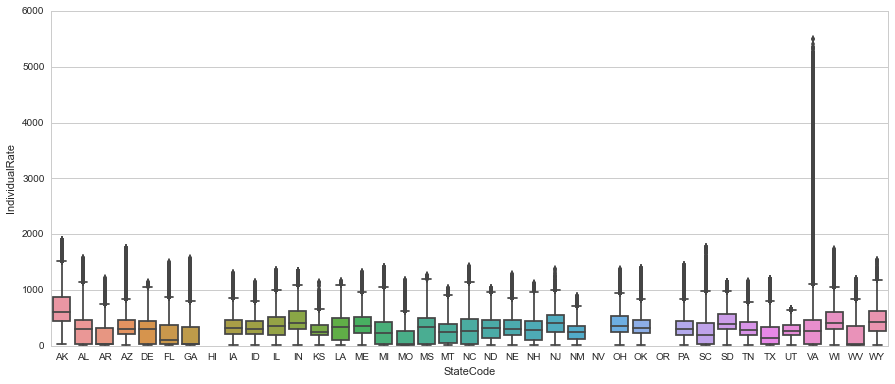

In [11]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2014, order=Statelist)

We should look at Virginia in more detail. What's the breakdown of premiums based on age?

In [178]:
df2014_va = df2014[df2014['StateCode'].isin(['VA'])].copy()

In [179]:
df2014_va.shape

(71208, 18)

In [180]:
df2014_va.describe()

,Unnamed: 0,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,71208.000000,71208,71208.000000,61318.000000,0,0,0,0,0,0,0
mean,3565098.997416,2014,607.800783,768.124408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,153586.877138,0,690.233496,863.353308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2555004.000000,2014,52.820000,63.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3565112.750000,2014,272.197500,335.602500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3582914.500000,2014,381.210000,473.315000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3611546.250000,2014,606.550000,768.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3642596.000000,2014,5503.850000,6604.610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We should plot the plan costs by age. Therefore we have to exclude the "Family Option" rates first.

In [181]:
exclude_list = df2014_va['Age'].isin(['Family Option'])
df2014_va_wofamily = df2014_va[~exclude_list]
age_labels = df2014_va_wofamily['Age'].unique()
age_labels = ['65+' if x=='65 and over' else x for x in age_labels]
len(age_labels), age_labels

(46,
 ['0-20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65+'])

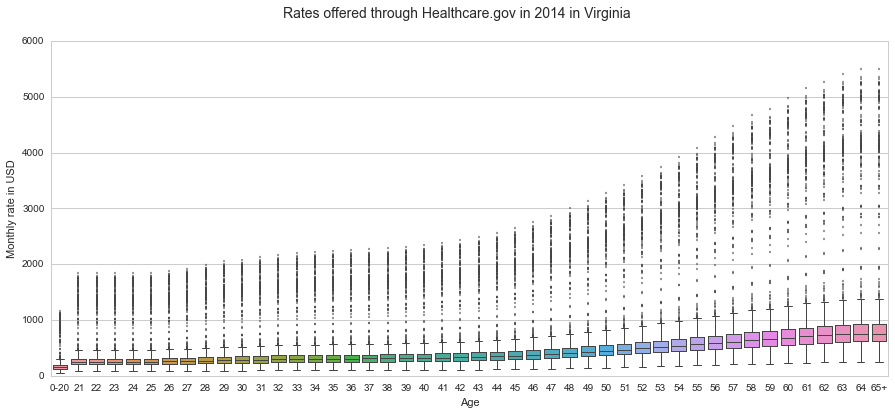

In [190]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Rates offered through Healthcare.gov in 2014 in Virginia', fontsize=14)

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_va_wofamily, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")

# Customize x tick lables
xticks = np.arange(46)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(age_labels)

plt.savefig('Virginia_rates_by_age.png', bbox_inches='tight', dpi=150)

This spread seems to be real. After some internet research it turns out that the wide range in monthly premiums in Virginia is due to plans covering gastric bypasses! In all other states, this type of surgery is covered by all plans, so the cost for these surgeries is distributed among all payees (http://www.webmd.com/health-insurance/20131011/why-some-virginia-health-plans-cost-so-much).

What about the really low premiums in Montana? Let's look into that.

### The case of Montana

We should create a small df for Montana 2014 to ease the exploration process

In [6]:
df2014_mo = df2014[df2014['StateCode'].isin(['MO'])].copy()

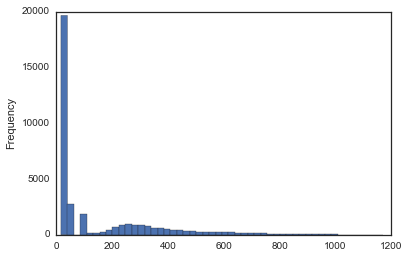

In [7]:
df2014_mo['IndividualRate'].plot.hist(50)

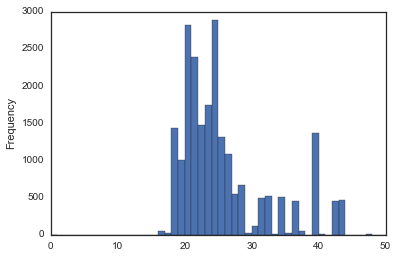

In [8]:
df2014_mo['IndividualRate'].plot.hist(50, range=(0, 50))

In [9]:
df2014_mo.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,40618,37018.000000,12512.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2014,157.784407,483.698700,49.273913,50.552304,72.199000,99.969522,76.618478,98.264826,126.035652
std,0,207.228153,234.649054,11.172008,10.261092,16.476146,29.757290,15.987663,20.807315,32.921070
min,2014,16.140000,68.220000,32.280000,31.760000,44.350000,44.350000,47.900000,63.510000,70.210000
25%,2014,23.190000,314.490000,40.555000,43.200000,60.295000,79.712500,64.912500,82.810000,101.420000
50%,2014,32.050000,418.125000,48.610000,50.170000,70.475000,100.670000,75.050000,96.050000,123.935000
75%,2014,265.477500,608.855000,55.130000,56.425000,82.935000,116.547500,85.395000,110.420000,143.427500
max,2014,1170.570000,1463.190000,80.970000,80.160000,119.880000,179.450000,120.680000,160.400000,219.980000


In [10]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12


I have a sinking suspicion that these low-cost plans are actually dental-only plans. We can read in another CSV file that can give us some hints about which is which.

### Distinguishing between full plans and dental-only plans

In [11]:
na_values = ['NaN', 'N/A', '0', '']
dental = pd.read_csv("PlanAttributes.csv", na_values=na_values)

/Users/akuepper/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
dental.columns

Index(['AVCalculatorOutputNumber', 'BeginPrimaryCareCostSharingAfterNumberOfVisits', 'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays', 'BenefitPackageId', 'BusinessYear', 'CSRVariationType', 'ChildOnlyOffering', 'ChildOnlyPlanId', 'CompositeRatingOffered', 'DEHBCombInnOonFamilyMOOP',
       ...
       'TEHBOutOfNetFamilyMOOP', 'TEHBOutOfNetFamilyPerGroupMOOP', 'TEHBOutOfNetFamilyPerPersonMOOP', 'TEHBOutOfNetIndividualMOOP', 'TIN', 'URLForEnrollmentPayment', 'URLForSummaryofBenefitsCoverage', 'UniquePlanDesign', 'VersionNum', 'WellnessProgramOffered'], dtype='object', length=176)

In [13]:
dental.shape

(77353, 176)

In [14]:
dental.head()

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamily,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1Family,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2Family,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamily,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,IssuerId2,MEHBCombInnOonFamilyMOOP,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamily,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1Family,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2Family,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamily,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,QHPNonQHPTypeId,RowNumber,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,StateCode2,TEHBCombInnOonFamilyMOOP,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamily,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1Family,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2Family,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamily,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutO

In [15]:
dental['DentalOnlyPlan'].unique()

array(['Yes', 'No'], dtype=object)

If we want to merge these dataframes we have to make sure that we have one identifier on which we can actually merge them. PlanId seems to be a natural choice. Unfortunately, there is no PlanId in the dental dataframe. However, there is a HIOSProductId that seems to be related.

In [16]:
len(dental['HIOSProductId'].unique())

3497

In [17]:
len(df['PlanId'].unique())

16808

These PlanId's from the Rate.csv file are not exactly the same as the HIOSProductId's from the PlanAttributes.csv file. The format is similar: 29416MO0010001 versus 21989AK002. I can try to strip the last four digits from the PlanId's to see if the number of PlanId's and HIOSProductId's matches then.

In [18]:
Ids = df.PlanId
mod_Ids = [x[:-4] for x in Ids]
len(set(mod_Ids))

3498

There is one more element in the modified PlanId list than in the dental list. Let's find it.

In [19]:
set(mod_Ids)-set(dental['HIOSProductId'].unique())

{'19312TZ001'}

TZ is not a valid State abbreviation. There's a plan in Texas with name 19312TX001, though. So let's change this typo.

In [20]:
mod_Ids = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids]
set(mod_Ids)-set(dental['HIOSProductId'].unique())

set()

Well, there we go. That was easy. Now lets add these new labels as a new column to the original DataFrame and then merge the dental DataFrame.

In [22]:
df.loc[:,'HIOSProductId'] = pd.Series(mod_Ids, index=df.index)

In [23]:
df.shape

(12442241, 16)

Let's do all this for the dfs of the individual three years

In [25]:
Ids_2014 = df2014.PlanId
mod_Ids_2014 = [x[:-4] for x in Ids_2014]
Ids_2015 = df2015.PlanId
mod_Ids_2015 = [x[:-4] for x in Ids_2015]
Ids_2016 = df2016.PlanId
mod_Ids_2016 = [x[:-4] for x in Ids_2016]

In [26]:
mod_Ids_2014 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2014]
mod_Ids_2015 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2015]
mod_Ids_2016 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2016]

In [27]:
df2014.loc[:,'HIOSProductId'] = mod_Ids_2014
df2015.loc[:,'HIOSProductId'] = mod_Ids_2015
df2016.loc[:,'HIOSProductId'] = mod_Ids_2016

In [37]:
len(set(df2014['HIOSProductId']))

1836

In [28]:
df2014.shape

(3676037, 16)

In [29]:
df2014.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3676037,3549143.000000,1601995.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,2014,317.420019,560.159229,48.318870,48.799154,68.371658,92.581684,71.081461,90.425835,114.622133
std,0,287.629720,334.529592,19.841312,18.060111,29.339670,45.725490,30.832572,42.059903,58.095334
min,2014,6.000000,55.660000,10.000000,10.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,2014,32.880000,341.200000,31.570000,33.590000,44.460000,53.670000,48.452500,61.860000,73.900000
50%,2014,293.700000,475.960000,46.355000,47.735000,69.485000,96.300000,71.330000,93.490000,119.640000
75%,2014,460.940000,695.310000,60.360000,60.360000,87.470000,121.387500,90.937500,117.405000,151.345000
max,2014,5503.850000,6604.610000,182.400000,169.650000,248.110000,357.940000,260.850000,339.310000,449.140000


Let's create a diet version of the dental DataFrame before we merge it with the df. We only need the DentalOnlyPlan column.

In [30]:
dental_diet = dental[['HIOSProductId', 'DentalOnlyPlan']].copy()  #.set_index('HIOSProductId')
dental_diet.shape

(77353, 2)

In [31]:
dental_diet.head()

,HIOSProductId,DentalOnlyPlan
0,21989AK002,Yes
1,21989AK002,Yes
2,21989AK002,Yes
3,21989AK001,Yes
4,21989AK001,Yes


In [32]:
dental_diet['DentalOnlyPlan'].value_counts()

No     65704
Yes    11649
Name: DentalOnlyPlan, dtype: int64

In [33]:
not_in_2014 = set(dental_diet['HIOSProductId'])-set(df2014['HIOSProductId'])
exclude_list_2014 = dental_diet['HIOSProductId'].isin(not_in_2014)
dental_2014 = dental_diet[~exclude_list_2014].drop_duplicates().reset_index(drop=True)

In [36]:
dental_2014['DentalOnlyPlan'].value_counts()

Yes    1074
No      762
Name: DentalOnlyPlan, dtype: int64

In [106]:
not_in_2015 = set(dental_diet['HIOSProductId'])-set(df2015['HIOSProductId'])
exclude_list_2015 = dental_diet['HIOSProductId'].isin(not_in_2015)
dental_2015 = dental_diet[~exclude_list_2015].drop_duplicates().reset_index(drop=True)

In [107]:
not_in_2016 = set(dental_diet['HIOSProductId'])-set(df2016['HIOSProductId'])
exclude_list_2016 = dental_diet['HIOSProductId'].isin(not_in_2016)
dental_2016 = dental_diet[~exclude_list_2016].drop_duplicates().reset_index(drop=True)

Merging the slim dental dataframe with the full dataframe containing all rates crashes for some reason. Let's try to merge the dental df with the dfs of the individual years -- and let's save them right away as CSV files so that we can start our further analysis from there.

In [38]:
#df_merged = pd.merge(df, dental_diet, on='HIOSProductId',how='left', sort=False) # doesn't work, kernel will freeze :(
df2014_merged = pd.merge(df2014, dental_2014, on='HIOSProductId', how='inner', sort=False)

In [97]:
df2014_merged.shape

(3676037, 17)

In [98]:
df2014_merged.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
0,2014,AK,21989AK0010001,Rating Area 1,No Preference,0-20,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
1,2014,AK,21989AK0010001,Rating Area 1,No Preference,21,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
2,2014,AK,21989AK0010001,Rating Area 1,No Preference,22,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
3,2014,AK,21989AK0010001,Rating Area 1,No Preference,23,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
4,2014,AK,21989AK0010001,Rating Area 1,No Preference,24,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes


In [40]:
df2014_cleaned = df2014_merged.drop_duplicates().reset_index(drop=True)

In [100]:
df2014_cleaned.shape

(3676037, 17)

In [57]:
df2014_cleaned['DentalOnlyPlan'].value_counts()

No     2370659
Yes    1305378
Name: DentalOnlyPlan, dtype: int64

In [64]:
df2014_merged_nodental = df2014_cleaned[df2014_cleaned['DentalOnlyPlan'].isin(['No'])].copy()

In [65]:
df2014_merged_nodental.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
1398,2014,AK,73836AK0620001,Rating Area 1,No Preference,0-20,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1399,2014,AK,73836AK0620001,Rating Area 1,No Preference,21,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1400,2014,AK,73836AK0620001,Rating Area 1,No Preference,22,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1401,2014,AK,73836AK0620001,Rating Area 1,No Preference,23,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1402,2014,AK,73836AK0620001,Rating Area 1,No Preference,24,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No


In [102]:
df2014_merged_nodental.shape

(2370659, 17)

In [103]:
df2014_merged_nodental.to_csv("Rates2014.csv")

In [108]:
df2015_merged = pd.merge(df2015, dental_2015, on='HIOSProductId',how='inner', sort=False)

In [109]:
df2015_cleaned = df2015_merged.drop_duplicates().reset_index(drop=True)

In [110]:
df2015_merged_nodental = df2015_cleaned[df2015_cleaned['DentalOnlyPlan'].isin(['No'])]

In [111]:
df2015_merged_nodental.to_csv("Rates2015.csv")

In [112]:
df2016_merged = pd.merge(df2016, dental_2016, on='HIOSProductId',how='inner', sort=False)

In [113]:
df2016_cleaned = df2016_merged.drop_duplicates().reset_index(drop=True)

In [114]:
df2016_merged_nodental = df2016_cleaned[df2016_cleaned['DentalOnlyPlan'].isin(['No'])]

In [115]:
df2016_merged_nodental.to_csv("Rates2016.csv")

### The cleaned datasets for full health insurance plan rates (the case of Montana continued)

Now that we have removed all the dental-only plans, we can actually have a look at the distribution of plan rates in Montana.

In [53]:
Ids_mo = df2014_mo.PlanId
mod_Ids_mo = [x[:-4] for x in Ids_mo]
len(set(mod_Ids_mo))

73

In [54]:
Ids_mo.shape

(40618,)

In [55]:
mod_Ids_mo = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_mo]
set(mod_Ids_mo)-set(dental['HIOSProductId'].unique())

set()

In [56]:
df2014_mo.loc[:,'HIOSProductId']= mod_Ids_mo

In [57]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12,29416MO001


In [58]:
len(set(mod_Ids_mo)), len(set(df2014_mo['HIOSProductId'])), len(set(dental_diet['HIOSProductId']))

(73, 73, 3497)

In [59]:
not_in_mo = set(dental_diet['HIOSProductId'])-set(df2014_mo['HIOSProductId'])
exclude_list = dental_diet['HIOSProductId'].isin(not_in_mo)
len(exclude_list)

77353

In [73]:
dental_mo = dental_diet[~exclude_list].drop_duplicates().reset_index(drop=True)

dental_mo.head()

,HIOSProductId,DentalOnlyPlan
0,32753MO077,No
1,32753MO081,Yes
2,32753MO084,Yes
3,44527MO015,No
4,44527MO016,No


In [74]:
df2014_mo.tail()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
2538347,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,61,1096.43,1370.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538348,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,62,1121.02,1401.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538349,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,63,1151.84,1439.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538350,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,64,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538351,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,65 and over,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093


In [75]:
df2014_mo_merged = pd.merge(df2014_mo, dental_mo, left_on='HIOSProductId', right_on='HIOSProductId', how='inner', sort=False)

In [76]:
df2014_mo_merged.shape

(40618, 17)

In [77]:
df2014_mo_cleaned = df2014_mo_merged.drop_duplicates().reset_index(drop=True)

In [78]:
df2014_mo_cleaned.shape

(40618, 17)

In [79]:
df2014_mo_merged_nodental = df2014_mo_cleaned[df2014_mo_cleaned['DentalOnlyPlan'].isin(['No'])]

In [80]:
df2014_mo_merged_nodental.shape

(12788, 17)

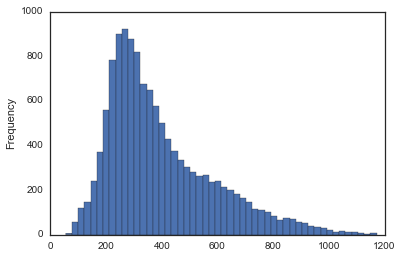

In [123]:
df2014_mo_merged_nodental['IndividualRate'].plot.hist(50)

In [82]:
df2014_mo_merged_nodental['IndividualRate'].median()

343.015

## Enough Data Cleaning, on to some actual analysis

Let's continue breaking the whole dataset down by year to see some trends on the individual types of rates.

In [5]:
df2014 = pd.read_csv("Rates2014.csv")
df2015 = pd.read_csv("Rates2015.csv")
df2016 = pd.read_csv("Rates2016.csv")

In [6]:
df2014.describe()

,Unnamed: 0,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,2370659.000000,2370659,2370659.000000,1601995.000000,0,0,0,0,0,0,0
mean,1870613.549387,2014,452.465814,560.159229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1066629.852990,0,246.828415,334.529592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1398.000000,2014,49.070000,55.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1055422.500000,2014,290.220000,341.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1815117.000000,2014,387.210000,475.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2754091.500000,2014,561.020000,695.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3656258.000000,2014,5503.850000,6604.610000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2014.median(numeric_only=True)

Unnamed: 0                                   1815117.00
BusinessYear                                    2014.00
IndividualRate                                   387.21
IndividualTobaccoRate                            475.96
Couple                                              NaN
PrimarySubscriberAndOneDependent                    NaN
PrimarySubscriberAndTwoDependents                   NaN
PrimarySubscriberAndThreeOrMoreDependents           NaN
CoupleAndOneDependent                               NaN
CoupleAndTwoDependents                              NaN
CoupleAndThreeOrMoreDependents                      NaN
dtype: float64

In [14]:
dfmedian2014 = df2014[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2015 = df2015[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2016 = df2016[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmean2014 = df2014[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2015 = df2015[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2016 = df2016[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfstd2014 = df2014[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2015 = df2015[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2016 = df2016[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)

In [63]:
dfmedians = pd.concat([dfmedian2014,dfmedian2015,dfmedian2016], keys=['2014', '2015', '2016'], axis=1)
dfmeans = pd.concat([dfmean2014,dfmean2015,dfmean2016], keys=['2014', '2015', '2016'], axis=1)
dfstd = pd.concat([dfstd2014,dfstd2015,dfstd2016], keys=['2014', '2015', '2016'], axis=1)
dfmedians

,2014,2015,2016
IndividualRate,387.21,403.48,427.05
IndividualTobaccoRate,475.96,448.61,467.76


In [38]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])
    return X_resample

In [174]:
boots = 500  #100 take about 5 minutes

dfs = [df2014,df2015,df2016]
stds = []
stds_smoker = []


for frame in dfs:
    medians = np.zeros(boots)
    medians_smoker = np.zeros(boots)
    for i in medians:
        df_resampled_ind = bootstrap_resample(frame['IndividualRate'])
        medians[i] = np.nanmedian(df_resampled_ind)
    for i in medians_smoker:
        df_resampled_smoker = bootstrap_resample(frame['IndividualTobaccoRate'])
        medians_smoker[i] = np.nanmedian(df_resampled_smoker)
    stds.append(np.std(medians))
    stds_smoker.append(np.std(medians_smoker))

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [175]:
stds, stds_smoker

([17.294764745193845, 18.02790801059291, 19.083839825200275],
 [21.269196487418132, 20.061140795986653, 20.909996496326826])

In [176]:
dfstd['2014']['IndividualRate'] = stds[0]
dfstd['2015']['IndividualRate'] = stds[1]
dfstd['2016']['IndividualRate'] = stds[2]
dfstd['2014']['IndividualTobaccoRate'] = stds_smoker[0]
dfstd['2015']['IndividualTobaccoRate'] = stds_smoker[1]
dfstd['2016']['IndividualTobaccoRate'] = stds_smoker[2]
dfstd

,2014,2015,2016
IndividualRate,17.294765,18.027908,19.083840
IndividualTobaccoRate,21.269196,20.061141,20.909996


/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


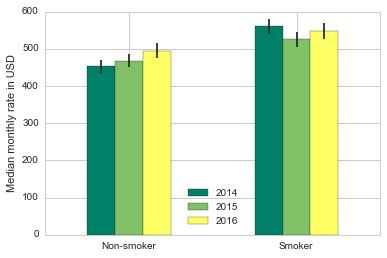

In [193]:
fig = plt.figure(figsize=(6, 6))

ax = dfmeans.plot.bar(yerr=dfstd, rot=0, colormap='summer')
ax.set_ylabel("Median monthly rate in USD")
ax.set_xlabel("")

# Customize x tick lables
#labels = ['Individual', 'Smoker', 'Couple', 'Individual w 1 child', 'Individual w 2 children', 'Individual w 2+ children', 'Couple w 1 child', 'Couple w 2 children', 'Couple w 2+ children']
#xticks = [0,1,2,3,4,5,6,7,8]
labels = ['Non-smoker', 'Smoker']
xticks = [0,1]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(labels)

plt.savefig('Overall_rates.png', bbox_inches='tight', dpi=150)

In [29]:
df = pd.concat([df2014,df2015,df2016])

In [79]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

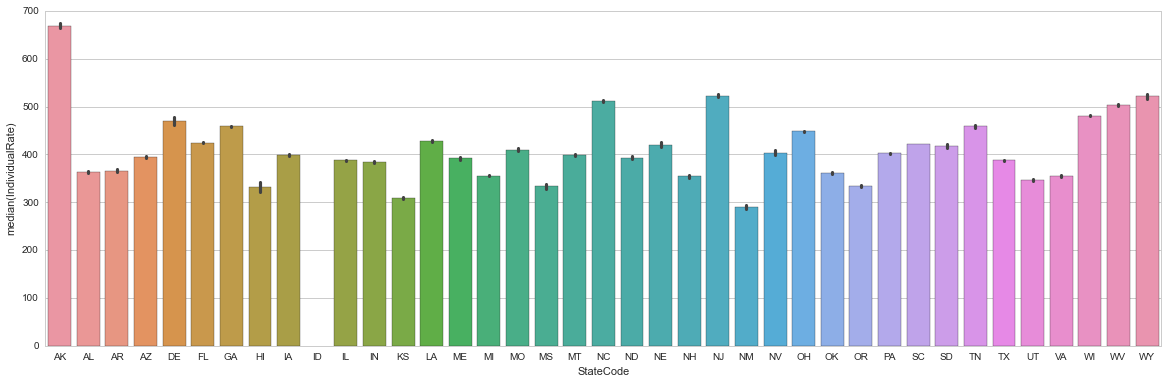

In [82]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2016['StateCode'], y=df2016['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

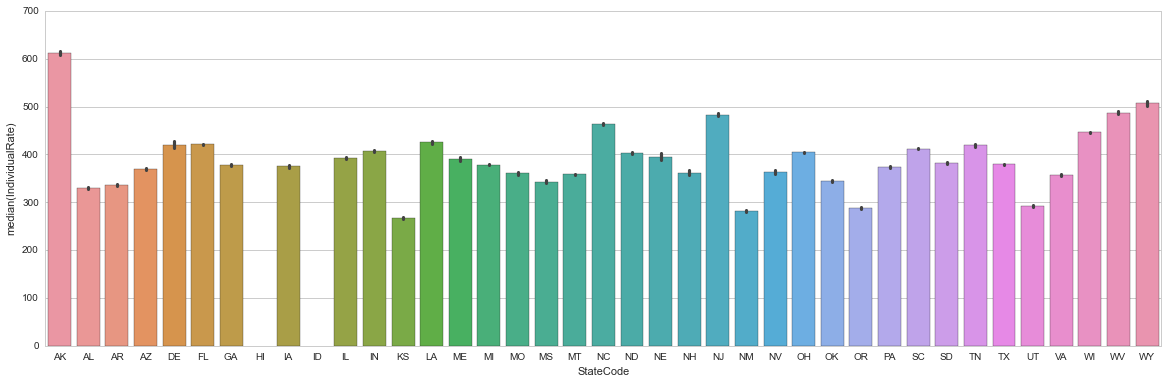

In [83]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2015['StateCode'], y=df2015['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

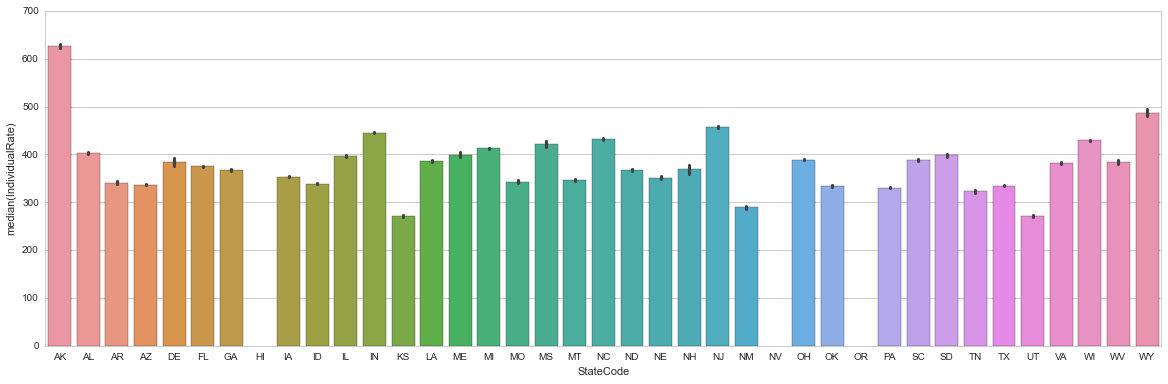

In [84]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2014['StateCode'], y=df2014['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

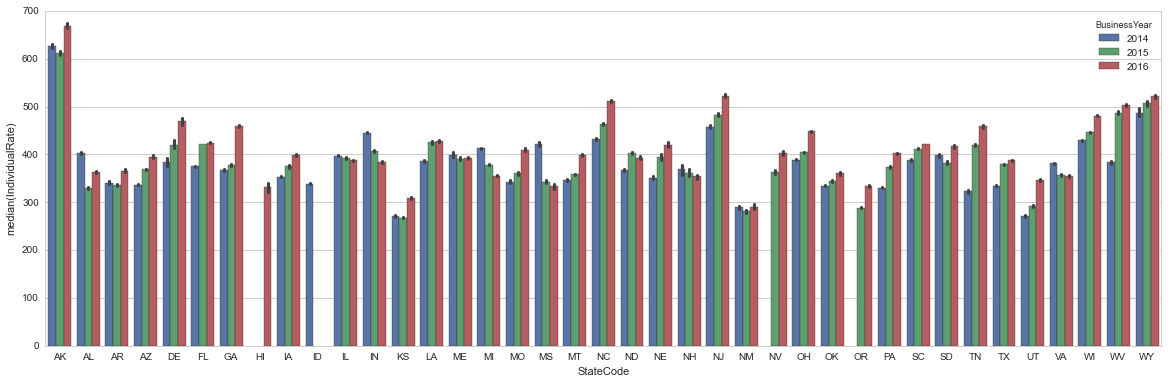

In [85]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df['StateCode'], y=df['IndividualRate'], hue=df['BusinessYear'], order=Statelist, estimator=np.median, ci=95, n_boot=100)

In [147]:
Statelist = df['StateCode'].unique()
State_medians = [] 
for state in Statelist:
    State_medians.append(np.median(df[df['StateCode'].isin([state])].IndividualRate))

In [148]:
Statelist

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

In [139]:
Statelist_ordered_by_rate = np.column_stack((np.asarray(Statelist), State_medians))
Statelist_ordered_by_rate

array([['AK', 632.76],
       ['AL', 373.33],
       ['AZ', 359.38],
       ['FL', 408.21],
       ['GA', 416.78],
       ['IN', 430.35],
       ['LA', 414.675],
       ['MO', 377.56],
       ['MS', 359.505],
       ['NC', 468.35],
       ['ND', 392.185],
       ['NJ', 495.65999999999997],
       ['OK', 345.22],
       ['PA', 359.9],
       ['SC', 414.52],
       ['TN', 405.03499999999997],
       ['TX', 367.06],
       ['WI', 455.63],
       ['WY', 509.5],
       ['AR', 347.705],
       ['DE', 434.2],
       ['IL', 392.52],
       ['KS', 280.685],
       ['ME', 393.37],
       ['MI', 387.505],
       ['MT', 368.605],
       ['NH', 358.175],
       ['NM', 286.33],
       ['VA', 364.55],
       ['WV', 477.62],
       ['IA', 368.19],
       ['ID', 338.94],
       ['NE', 372.915],
       ['OH', 416.3],
       ['SD', 396.305],
       ['UT', 300.53],
       ['NV', 384.695],
       ['OR', 308.0],
       ['HI', 332.29]], dtype=object)

In [145]:
Statelist_ordered_by_rate = Statelist_ordered_by_rate[Statelist_ordered_by_rate[:, 1].argsort()]

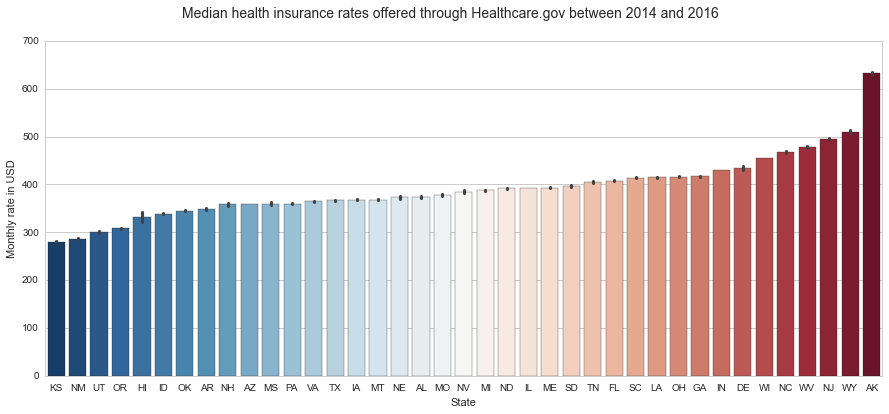

In [194]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Median health insurance rates offered through Healthcare.gov between 2014 and 2016', fontsize=14)

ax = sns.barplot(x=df['StateCode'], y=df['IndividualRate'], order=Statelist_ordered_by_rate[:,0], estimator=np.median, ci=95, n_boot=100, palette="RdBu_r")
ax.set_ylabel("Monthly rate in USD")
ax.set_xlabel("State")

plt.savefig('Median_rates_by_state.png', bbox_inches='tight', dpi=150)